# Table of Contents


- **Geting Started**
    - Set Up Environment
    - Import Data
- TBD

Note: this notebook is meant to be a demo of some of the capabilities of **`oo-learning`** (https://github.com/shane-kercheval/oo-learning); it is not meant to show the best approach to exploring/cleaning/modeling this particular dataset. Also, with most graphs (e.g. correlations/box-plots/etc.) I will spend very little time commenting on the significance of any interesting or patterns. Again, the intent is to show a demo, not a guide to data analysis. 



# Getting Started

In this notebook, we'll see how to search across different models and hyper-parameters (or the same models and hyper-parameters with different transformations, for example) with the goal of finding the "best" or ideal model candidates for further tuning and optimization.

## Set Up Environment

In [1]:
# !pip install oolearning --upgrade

In [2]:
from oolearning import *
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
width = 10
plt.rcParams['figure.figsize'] = [width, width/1.333]

## Import Data

`ExploreRegressionDataset` is a convenience class described in the [first notebook of this series](https://github.com/shane-kercheval/oo-learning/blob/master/examples/regression-insurance/1-Exploring.ipynb).

In [3]:
csv_file = '../data/insurance.csv'
target_variable = 'expenses'

explore = ExploreRegressionDataset.from_csv(csv_file_path=csv_file,
                                                target_variable=target_variable)

In [7]:
explore.dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [ ]:

model_linear_regression = LinearRegressor()
model_linear_regression.train(data_x=train_x, data_y=train_y)
predictions_linear_regression = model_linear_regression.predict(data_x=holdout_x)

model_cart = CartDecisionTreeRegressor()
model_cart.train(data_x=train_x, data_y=train_y, hyper_params=CartDecisionTreeHP(criterion='mse'))
predictions_cart = model_cart.predict(data_x=holdout_x)

In [14]:
regression_trainer = ModelTrainer(model=LinearRegressor(),
                       model_transformations=[PolynomialFeaturesTransformer(degrees=2),
                                              DummyEncodeTransformer(CategoricalEncoding.DUMMY)],
                       splitter= RegressionStratifiedDataSplitter(holdout_ratio=0.3),
                       evaluator=RegressionEvaluator())
regression_trainer.train(data=explore.dataset, target_variable='expenses', hyper_params=None)

# access the holdout metrics (we also have `training_evaluator` available to us as well!) and get a summary
regression_trainer.holdout_evaluator.all_quality_metrics

{'Mean Absolute Error (MAE)': 4242.941296635273,
 'Mean Squared Error (MSE)': 34884875.97277927,
 'RMSE to Standard Deviation of Target': 0.4887979980578053,
 'Root Mean Squared Error (RMSE)': 5906.342012851886,
 'Total Observations': 402}

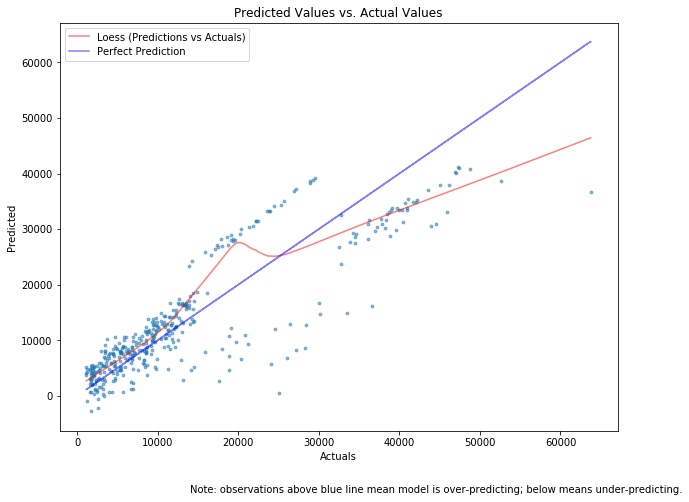

In [17]:
regression_trainer.holdout_evaluator.plot_predictions_vs_actuals()

In [54]:
gbr_trainer = ModelTrainer(model=GradientBoostingRegressor(),
                       model_transformations=[DummyEncodeTransformer(CategoricalEncoding.DUMMY)],
                       splitter= RegressionStratifiedDataSplitter(holdout_ratio=0.3),
                       evaluator=RegressionEvaluator())
gbr_trainer.train(data=explore.dataset, target_variable='expenses', hyper_params=GradientBoostingRegressorHP())

# access the holdout metrics (we also have `training_evaluator` available to us as well!) and get a summary
gbr_trainer.holdout_evaluator.all_quality_metrics

{'Mean Absolute Error (MAE)': 2613.4835461484795,
 'Mean Squared Error (MSE)': 21654660.918443073,
 'RMSE to Standard Deviation of Target': 0.3851115294754094,
 'Root Mean Squared Error (RMSE)': 4653.456878326378,
 'Total Observations': 402}

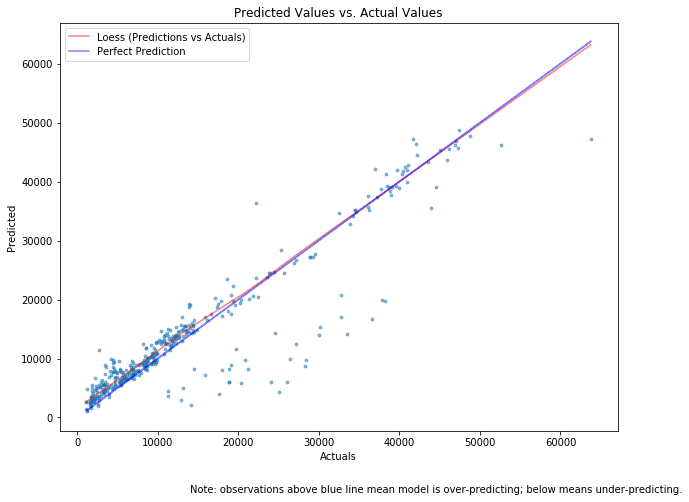

In [55]:
gbr_trainer.holdout_evaluator.plot_predictions_vs_actuals()

In [52]:
ada_trainer = ModelTrainer(model=AdaBoostRegressor(),
                       model_transformations=[DummyEncodeTransformer(CategoricalEncoding.DUMMY)],
                       splitter= RegressionStratifiedDataSplitter(holdout_ratio=0.3),
                       evaluator=RegressionEvaluator())
ada_trainer.train(data=explore.dataset, target_variable='expenses', hyper_params=AdaBoostRegressorHP())

# access the holdout metrics (we also have `training_evaluator` available to us as well!) and get a summary
ada_trainer.holdout_evaluator.all_quality_metrics

{'Mean Absolute Error (MAE)': 2283.1995641308476,
 'Mean Squared Error (MSE)': 24657627.31136242,
 'RMSE to Standard Deviation of Target': 0.41094761941685415,
 'Root Mean Squared Error (RMSE)': 4965.644702489539,
 'Total Observations': 402}

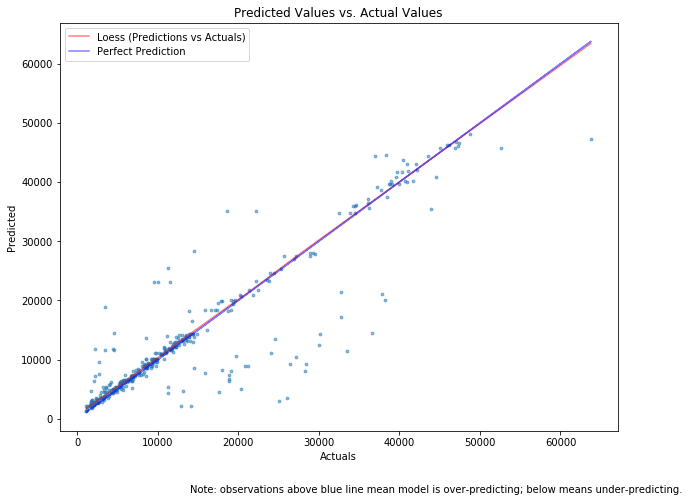

In [53]:
ada_trainer.holdout_evaluator.plot_predictions_vs_actuals()

In [32]:
cart_trainer = ModelTrainer(model=CartDecisionTreeRegressor(),
                       model_transformations=[PolynomialFeaturesTransformer(degrees=3),DummyEncodeTransformer(CategoricalEncoding.DUMMY)],
                       splitter= RegressionStratifiedDataSplitter(holdout_ratio=0.3),
                       evaluator=RegressionEvaluator())
cart_trainer.train(data=explore.dataset, target_variable='expenses', hyper_params=CartDecisionTreeHP(criterion='mse'))

# access the holdout metrics (we also have `training_evaluator` available to us as well!) and get a summary
cart_trainer.holdout_evaluator.all_quality_metrics

{'Mean Absolute Error (MAE)': 3106.3397761194014,
 'Mean Squared Error (MSE)': 46113226.04494501,
 'RMSE to Standard Deviation of Target': 0.5619835197229083,
 'Root Mean Squared Error (RMSE)': 6790.671987730302,
 'Total Observations': 402}

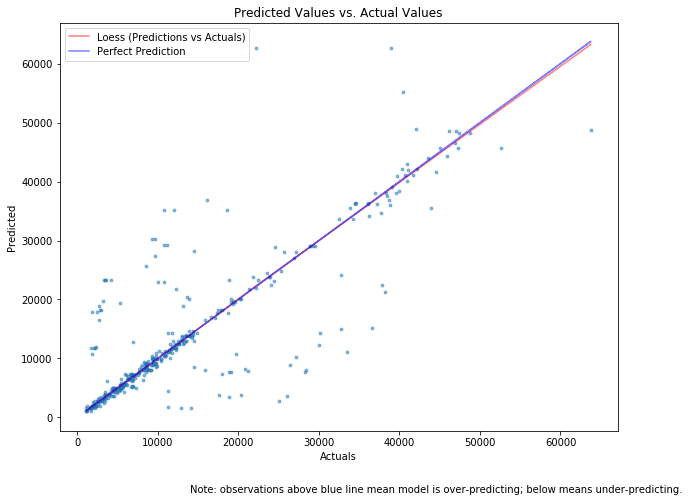

In [33]:
cart_trainer.holdout_evaluator.plot_predictions_vs_actuals()

In [48]:
splitter = RegressionStratifiedDataSplitter(holdout_ratio=0.30) 
training_indexes, holdout_indexes = splitter.split(target_values=explore.dataset.expenses)

training_y = explore.dataset.iloc[training_indexes][target_variable]
training_x = explore.dataset.iloc[training_indexes].drop(columns=target_variable)

holdout_y = explore.dataset.iloc[holdout_indexes][target_variable]
holdout_x = explore.dataset.iloc[holdout_indexes].drop(columns=target_variable)

In [50]:
model_cart = CartDecisionTreeRegressor()
model_cart.train(data_x=training_x, data_y=training_y, hyper_params=CartDecisionTreeHP(criterion='mse'))

model_ada = AdaBoostRegressor()
model_ada.train(data_x=training_x, data_y=training_y, hyper_params=AdaBoostRegressorHP())

model_gbr = GradientBoostingRegressor()
model_gbr.train(data_x=training_x, data_y=training_y, hyper_params=GradientBoostingRegressorHP())

ValueError: could not convert string to float: 'southeast'

In [51]:
cart_trainer.model

In [56]:
trainer_agg = ModelTrainer(model= ModelAggregator(models=[cart_trainer.model, ada_trainer.model, gbr_trainer.model],
                                   aggregation_strategy=MeanAggregationStrategy()),
                       model_transformations=None,
                       splitter= RegressionStratifiedDataSplitter(holdout_ratio=0.3),
                       evaluator=RegressionEvaluator())
trainer_agg.train(data=explore.dataset, target_variable='expenses', hyper_params=None)

# access the holdout metrics (we also have `training_evaluator` available to us as well!) and get a summary
trainer_agg.holdout_evaluator.all_quality_metrics

AssertionError: 

In [ ]:
trainer_agg.holdout_evaluator.plot_predictions_vs_actuals()

# Set up Base Models

In [ ]:
base_models=[ModelDefaults.get_LinearRegressor(degrees=2),
                                                  ModelDefaults.get_CartDecisionTreeRegressor(),
                                                  ModelDefaults.get_GradientBoostingRegressor()]